# Efficient_Net

THE FOLLOWING STEPS ARE INVOLVED IN THE ENTIRE PROCESS OF IMAGE CLASSIFICATION

1.IMPORTING LIBRARIES

2.IMAGE PROCESSING

3.MODEL CREATION

4.MODEL COMPILATION

5.MODEL TRAINING

6.MODEL EVALUATION

7.MODEL PREDICTION

STEP 1-importing essential libraries tensorflow is a deep learning framework suitable for applications involving neural networks.

using tensorflow we can build,train,evaluate and predict our neural network.



In [ ]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

2024-04-03 00:38:57.983416: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
data ='archive (3)/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

STEP 2-image processing
the imagedatagenerator is used to implement data augmentation. we can process the image as we want and create batches of image data.

check this link for further details:- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator



In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)


In [ ]:
# image addressing
train_generator = train_datagen.flow_from_directory(
    data,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    data,
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    data,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')

Found 1097 images belonging to 3 classes.
Found 1097 images belonging to 3 classes.
Found 1097 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Bengin cases': 0, 'Malignant cases': 1, 'Normal cases': 2}

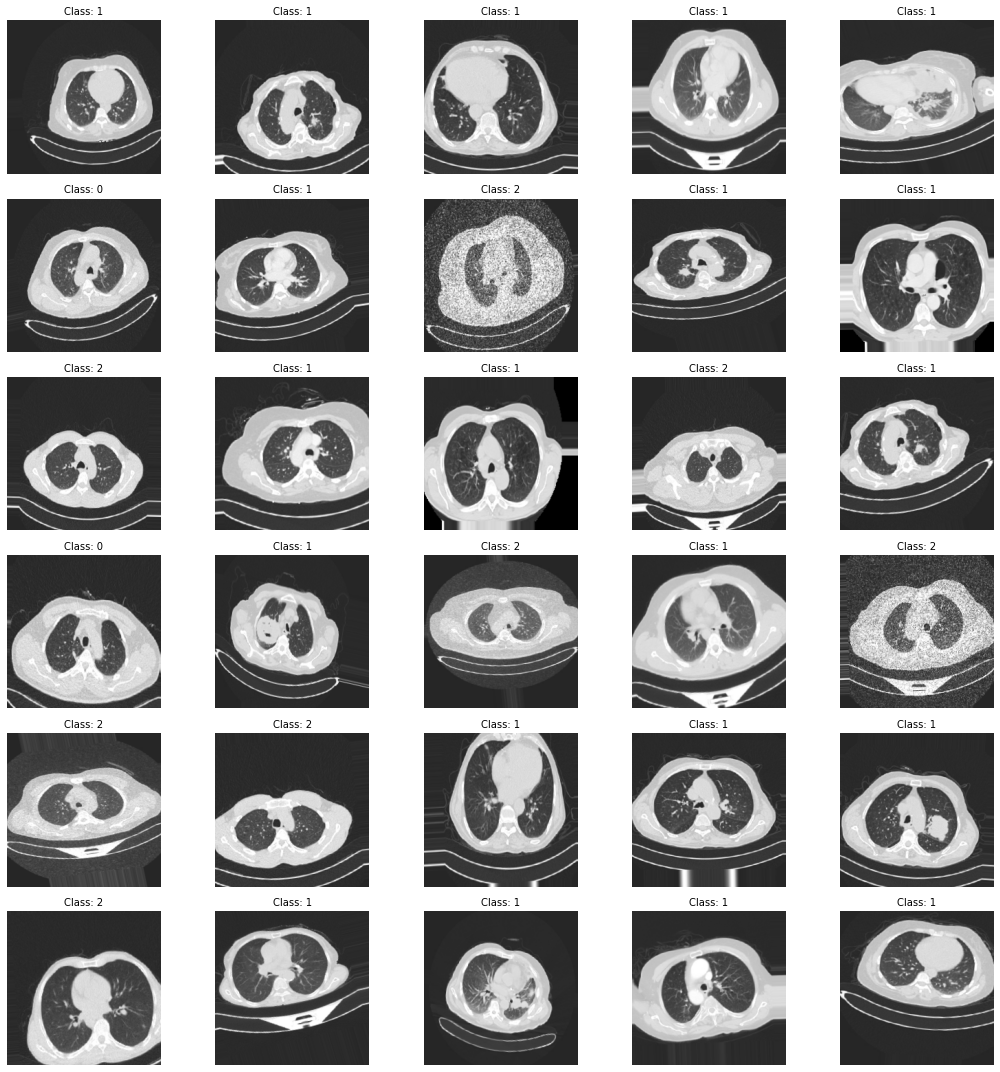

In [ ]:
import matplotlib.pyplot as plt

# Set the number of images to display
num_images_to_display = 30

# Initialize a counter for displayed images
displayed_images = 0

# Set the figure size for larger images
plt.figure(figsize=(15, 15))

# Iterate through generator batches until reaching the desired number of displayed images
for batch_images, batch_labels in train_generator:
    batch_size = batch_images.shape[0]
    for i in range(batch_size):
        if displayed_images < num_images_to_display:
            plt.subplot(6, 5, displayed_images + 1)
            plt.imshow(batch_images[i].astype('uint8'))
            plt.title(f"Class: {batch_labels[i].argmax()}", fontsize=10)
            plt.axis("off")
            displayed_images += 1
        else:
            break

    if displayed_images >= num_images_to_display:
        break

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


STEP 3-model creation
we are using the pretrained cnn meaning that the cnn is already trained on the imagenet dataset and has the weights stored in it. we are going to customise the model by adding additional layers of our choice(remember more layers can increase parameters leading to overfitting).

we are using the MobileNetV2 model for this application. this model was developed by google in 2017 and is known for its light memory. this model is ideal for devices with less RAM and processing power like microcomputers and mobiles.

input_shape=(224,224,3) => this is the input dimensions of the model. this is the parameter mentioned in the processing part. the 3 refers to the three channels R,G,B

we are training it partially so as to reduce the traning time on the stake of accuracy. (it is better to train model fully for better results)

In [ ]:
from tensorflow.keras import regularizers
from keras.regularizers import l2

base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(GaussianNoise(0.35))
model.add(GlobalAveragePooling2D())
model.add(Dense(356,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise (GaussianNo  (None, 7, 7, 1408)        0         
 ise)                                                            
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 356)               501604    
                                                                 
 batch_normalization (Batch  (None, 356)               1424      
 Normalization)                                         

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)


Epoch 1/10
69/69 [==============================] - 294s 4s/step - loss: 0.6512 - accuracy: 0.7931 - precision: 0.7998 - recall: 0.7830 - auc: 0.9209 - val_loss: 0.3552 - val_accuracy: 0.8578 - val_precision: 0.8749 - val_recall: 0.8350 - val_auc: 0.9683
Epoch 2/10
69/69 [==============================] - 255s 4s/step - loss: 0.4743 - accuracy: 0.8396 - precision: 0.8452 - recall: 0.8359 - auc: 0.9506 - val_loss: 0.2913 - val_accuracy: 0.8769 - val_precision: 0.8843 - val_recall: 0.8706 - val_auc: 0.9754
Epoch 3/10
69/69 [==============================] - 265s 4s/step - loss: 0.3772 - accuracy: 0.8578 - precision: 0.8631 - recall: 0.8505 - auc: 0.9638 - val_loss: 0.2624 - val_accuracy: 0.8988 - val_precision: 0.9030 - val_recall: 0.8906 - val_auc: 0.9818
Epoch 4/10
69/69 [==============================] - 209s 3s/step - loss: 0.3622 - accuracy: 0.8551 - precision: 0.8586 - recall: 0.8469 - auc: 0.9666 - val_loss: 0.2174 - val_accuracy: 0.9098 - val_precision: 0.9120 - val_recall: 0.907

Model evaluation
the trained model is evaluated on training, validation and test dataset

In [ ]:
model.evaluate(train_generator)

69/69 [==============================] - 101s 1s/step - loss: 0.1546 - accuracy: 0.9316 - precision: 0.9324 - recall: 0.9307 - auc: 0.9930


[0.15463055670261383,
 0.9316317439079285,
 0.9324200749397278,
 0.9307201504707336,
 0.9930040240287781]

In [ ]:
model.evaluate(test_generator)


69/69 [==============================] - 102s 1s/step - loss: 0.1488 - accuracy: 0.9426 - precision: 0.9434 - recall: 0.9417 - auc: 0.9936


[0.14883959293365479,
 0.9425706267356873,
 0.9433789849281311,
 0.9416590929031372,
 0.9935611486434937]

Performance

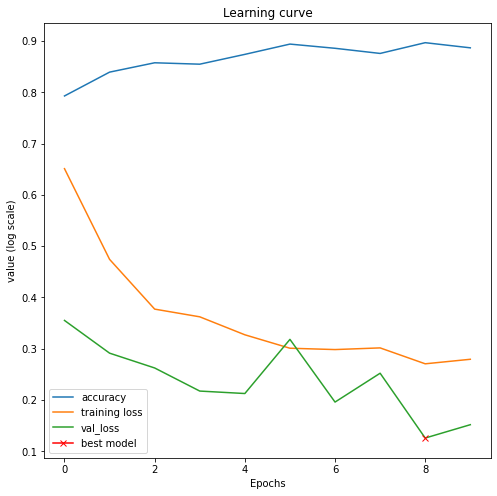

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

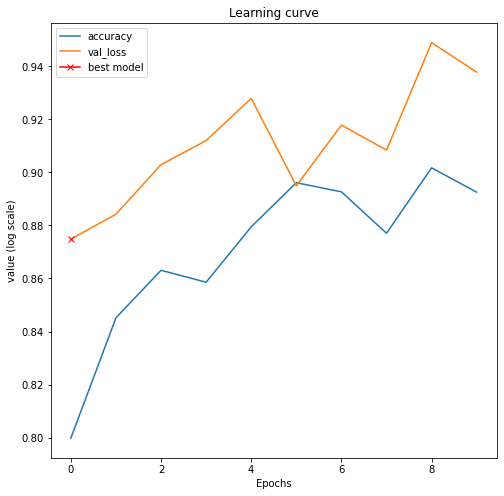

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

1/1 [==============================] - 0s 87ms/step
[[0.00303428 0.9955586  0.00140704]]
THE UPLOADED IMAGE SEEMS TO BE: Malignant cases


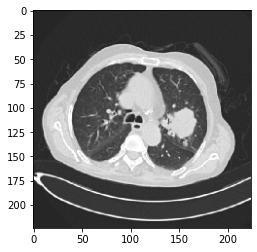

In [ ]:
from keras.preprocessing import image
img = image.load_img('Malignant case (4).jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Bengin cases"
elif a==1:
    op="Malignant cases"
elif a==2:
    op="Polyp"
else:
    op="Normal cases"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))

In [ ]:
model.save('modelfinal')